In [133]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import csv
import time
from os.path import isfile
import pandas as pd
import re
import spacy

model = SentenceTransformer('all-mpnet-base-v2')

In [134]:
import matplotlib.pyplot as plt
embeddings_path = "./archive/encodings.npy"


def create_encoding(model : SentenceTransformer, text : list[str], location="./encodings.npy"):
    # Create and save the encodings to the specified file
    return np.array(model.encode(text))


def plot(tensor):
  x = np.arange(len(tensor))
  y = tensor
  plt.plot(x,y)
  plt.xlabel('Sample Number')
  plt.ylabel('Similarity')
  plt.title('Similarity scores')
  plt.show()

def find_similarity(model, embeddings, text):
  question_embedding = model.encode(text)
  print(len(question_embedding))
  print(len(embeddings))
  return util.dot_score(embeddings, question_embedding)

def generate_all_text_emeddings(model, text: list[str]):
   return [model.encode(val) for val in text]

def split_sentances(text: str):
  #text = text.replace('\n', '').replace('?', '').replace('.', '')

  # Split the string into sentences using regular expression
  return re.split('(?<=[.!?]) +', text)



In [135]:
def prepare_dataframe(df: pd.DataFrame):
    df["Split_Text"] = df["ABSTRACT"].apply(lambda x: split_sentances(x))


df_test = pd.read_csv("./archive/test_tm/test.csv")
df_train = pd.read_csv("./archive/train_tm/train.csv")


vals = np.array([])
prepare_dataframe(df_train)
prepare_dataframe(df_test)

df_train.head()
#df_test.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Split_Text
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,[ Predictive models allow subject-specific in...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,[ Rotation invariance and translation invaria...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,[ We introduce and develop the notion of sphe...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,[ The stochastic Landau--Lifshitz--Gilbert (L...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,[ Fourier-transform infra-red (FTIR) spectra ...


In [136]:
text = df_train["Split_Text"][800]
text += text
encoding = create_encoding(model, text)[0]
len(encoding)
# print(encoding)
for val in text:
    print(val)

  We prove a general width duality theorem for combinatorial structures with
well-defined notions of cohesion and separation.
These might be graphs and
matroids, but can be much more general or quite different.
The theorem asserts
a duality between the existence of high cohesiveness somewhere local and a
global overall tree structure.
We describe cohesive substructures in a unified way in the format of tangles:
as orientations of low-order separations satisfying certain consistency axioms.
These axioms can be expressed without reference to the underlying structure,
such as a graph or matroid, but just in terms of the poset of the separations
themselves.
This makes it possible to identify tangles, and apply our
tangle-tree duality theorem, in very diverse settings.
Our result implies all the classical duality theorems for width parameters in
graph minor theory, such as path-width, tree-width, branch-width or rank-width.
It yields new, tangle-type, duality theorems for tree-width and pat

In [137]:
results = [None] * len(text)
all_embeddings = generate_all_text_emeddings(model, text)
# for i in range(len(results)):
#     results[i] = find_similarity(model, encoding, text[i])
print(f"({len(all_embeddings)}, {len(all_embeddings[0])})")


(22, 768)


In [138]:
results = np.ones((len(all_embeddings), len(all_embeddings)))
print(results.shape)
for i in range(len(all_embeddings)):
    for j in range(len(all_embeddings)):
        if i != j:
            results[i,j] = util.dot_score(all_embeddings[i], all_embeddings[j])


(22, 22)


In [141]:
print(results)

[[ 1.          0.26287282  0.57300395  0.531717    0.68745065  0.36638045
   0.18204011  0.09634304  0.14073095  0.15693076  0.40186793  1.
   0.26287282  0.57300395  0.531717    0.68745065  0.36638045  0.18204011
   0.09634304  0.14073095  0.15693076  0.40186793]
 [ 0.26287282  1.          0.34923431  0.3201589   0.47004366  0.26993912
   0.33663845  0.27491981  0.13662982  0.31273109  0.05509862  0.26287282
   1.00000024  0.34923431  0.3201589   0.47004366  0.26993912  0.33663845
   0.27491981  0.13662982  0.31273109  0.05509862]
 [ 0.57300395  0.34923431  1.          0.59120113  0.67672217  0.5396015
   0.42571443  0.08893351  0.26617315  0.18194383  0.34724846  0.57300395
   0.34923431  1.00000024  0.59120113  0.67672217  0.5396015   0.42571443
   0.08893351  0.26617315  0.18194383  0.34724846]
 [ 0.531717    0.3201589   0.59120113  1.          0.67429721  0.41081023
   0.38459399  0.12889862  0.22811653  0.189953    0.12753406  0.531717
   0.3201589   0.59120113  0.99999994  0.674

In [139]:
avg = [None] * len(results)
for i in range(len(results)):
    temp = results[i]
    np.delete(temp, i)
    avg[i] = np.sum(temp) / len(temp)

print(avg)

[0.3999397863041271, 0.34438788348978217, 0.4581615071405064, 0.4170255132696845, 0.5092932500622489, 0.45776397531682794, 0.43035851926966145, 0.33707438239997084, 0.3259434456175024, 0.3520120981318707, 0.24541652299971742, 0.3999397863041271, 0.34438788348978217, 0.4581615071405064, 0.4170255132696845, 0.5092932500622489, 0.45776397531682794, 0.43035851926966145, 0.33707438239997084, 0.3259434456175024, 0.3520120981318707, 0.24541652299971742]


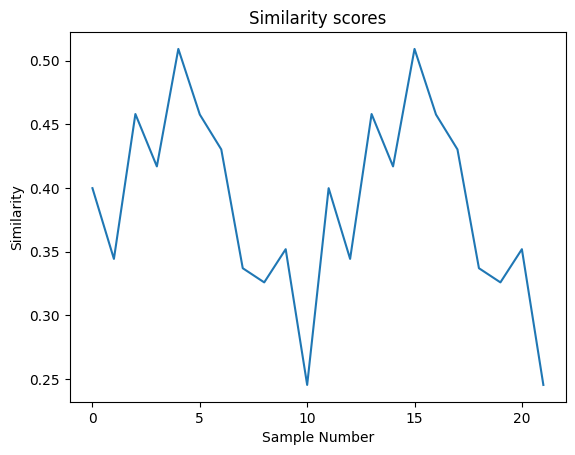

In [140]:
plot(avg)